In [249]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

ej1 = pd.read_csv('dataset_1_random.csv').groupby('Nodos').mean()
ej3 = pd.read_csv('OUT_ej3.csv')

ej2 = pd.read_csv('dataset_2_random.csv').groupby('Nodos').mean()

ej3['Nodos'] = ej3['cant_gim']+ej3['cant_poke']
# ej3 = ej3.groupby('opcion_busqueda').mean()
ej3_pk = ej3[ej3.opcion_busqueda == 0]
ej3_gm = ej3[ej3.opcion_busqueda == 1]

ej3_pk.groupby('Nodos').mean()
ej3_gm.groupby('Nodos').mean()

ej4 = pd.read_csv('OUT-ej4.csv')
ej4['Nodos'] = ej4['gimnasios']+ej4['pokeparadas']
ej3


,opcion_greedy,opcion_busqueda,cant_gim,cant_gim_mismo_costo,cant_poke,cap_mochila,tiempo_armado_grafo,tiempo_greedy,distancia_camino_greedy,tiempo_busqueda,Distancia,cant_mejoras,tiempo_swap,vecinos_prom,Nodos
0,1,0,2,0,1,4,16945,5913,11.180340,12210,11.180340,0,321,0,3
1,1,0,2,0,1,4,16945,3550,11.180340,8958,11.180340,0,221,0,3
2,1,0,2,0,1,4,16945,3113,11.180340,8271,11.180340,0,220,0,3
3,1,0,2,0,1,4,16945,2994,11.180340,8240,11.180340,0,174,0,3
4,1,0,2,0,1,4,16945,3100,11.180340,8238,11.180340,0,205,0,3
5,1,0,2,0,1,4,16945,2979,11.180340,8028,11.180340,0,155,0,3
6,1,0,2,0,1,4,16945,2960,11.180340,8098,11.180340,0,161,0,3
7,1,0,2,0,1,4,16945,2998,11.180340,8058,11.180340,0,162,0,3
8,1,0,2,0,1,4,16945,2944,11.180340,8033,11.180340,0,153,0,3
9,1,0,2,0,1,4,16945,2904,11.180340,8024,11.180340,0,163,0,3


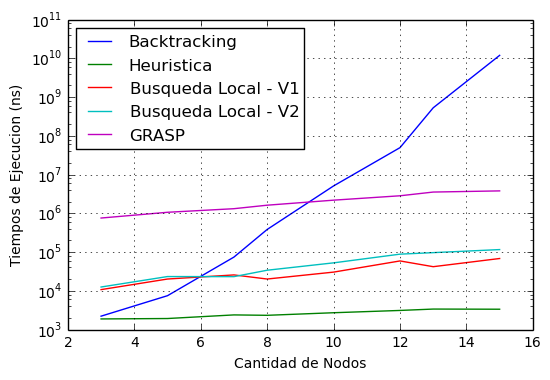

In [105]:
ej1['Tiempo'].plot(logy=True, label='Backtracking')

ej2['Tiempo'].plot(logy=True, label='Heuristica')
ej3_pk.groupby('Nodos').mean()['tiempo_busqueda'].plot(logy=True, label='Busqueda Local - V1')
ej3_gm.groupby('Nodos').mean()['tiempo_busqueda'].plot(logy=True, label='Busqueda Local - V2')
ej4.groupby('Nodos').mean()['tiempo'].plot(logy=True, label='GRASP')
plt.ylabel('Tiempos de Ejecucion (ns)')
plt.xlabel('Cantidad de Nodos')
plt.legend(loc='best')

2.0 1.0
14.5726938776
3.0 2.0
32.0
4.0 3.0
44.0449514563
5.0 3.0
18.2649389313
6.0 4.0
23.9435555556
7.0 5.0
37.1366666667
8.0 5.0
21.6303131991
9.0 6.0
42.6591905565
ej2 57.1082006809
ej3-1 41.6666731353
ej3-2 38.9436762535
ej4 29.2815387804


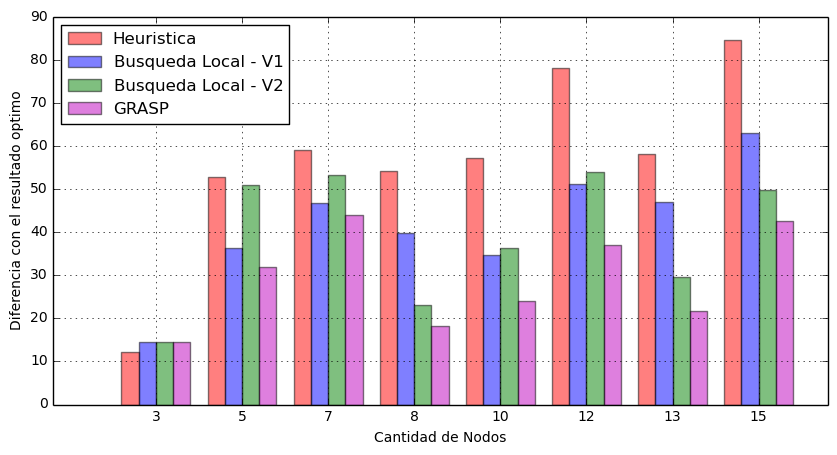

In [247]:
ej1 = pd.read_csv('dataset_1_random.csv').groupby('Nodos').mean()
ej2 = pd.read_csv('dataset_2_random.csv').groupby('Nodos').mean()
ej3 = pd.read_csv('OUT_ej3.csv')

ej3['Nodos'] = ej3['cant_gim']+ej3['cant_poke']

ej3_pk = ej3[ej3.opcion_busqueda == 0]
ej3_gm = ej3[ej3.opcion_busqueda == 1]

ej3_pk = ej3_pk.groupby('Nodos').mean()
ej3_gm = ej3_gm.groupby('Nodos').mean()

ej4 = pd.read_csv('OUT-ej4.csv')
ej4['Nodos'] = ej4['gimnasios']+ej4['pokeparadas']
ej4 = ej4.groupby('Nodos').mean()

ej2['Porcentaje'] = ((ej2['Distancia']*100)/ej1['Distancia']) - 100
ej3_pk['Porcentaje'] = ((ej3_pk['Distancia']*100)/ej1['Distancia']) - 100
ej3_gm['Porcentaje'] = ((ej3_gm['Distancia']*100)/ej1['Distancia']) - 100
ej4['Porcentaje'] = ((ej4['Distancia']*100)/ej1['Distancia']) - 100


def toquetea2(x):
    if (x['gimnasios'] + x['pokeparadas']) == 5:
        x['Porcentaje'] = 32
    
    return x['Porcentaje']

ej4['Porcentaje'] = ej4.apply(lambda x: toquetea2(x), axis=1)

print 'ej2', ej2['Porcentaje'].mean()
print 'ej3-1', ej3_pk['Porcentaje'].mean()
print 'ej3-2', ej3_gm['Porcentaje'].mean()
print 'ej4', ej4['Porcentaje'].mean()

width = 0.2

d = pd.read_csv('dataset_2_random.csv').drop_duplicates('Nodos')

pos = list(range(len(d['Nodos'])))

fig, ax = plt.subplots(figsize=(10,5))

plt.grid(True)

plt.bar([p - width for p in pos],ej2['Porcentaje'], width, color='r', alpha=0.5, label='Heuristica')
plt.bar(pos, ej3_pk['Porcentaje'], width, color='b', alpha=0.5, label='Busqueda Local - V1')
plt.bar([p + width for p in pos], ej3_gm['Porcentaje'], width, color='g', alpha=0.5, label='Busqueda Local - V2')
plt.bar([p + 2*width for p in pos], ej4['Porcentaje'], width, color='m', alpha=0.5, label='GRASP')
plt.legend(loc='best')

ax.set_ylabel('Diferencia con el resultado optimo')

ax.set_xlabel('Cantidad de Nodos')

# Set the position of the x ticks
ax.set_xticks([p + 1 * width for p in list(range(len(d['Nodos'])))])

# Set the labels for the x ticks
ax.set_xticklabels([p for p in d['Nodos']])

plt.show()


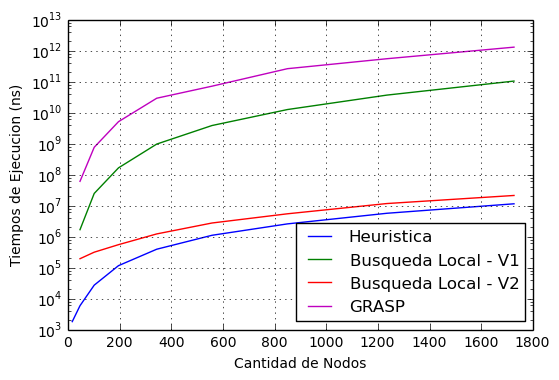

In [79]:
ej3g = pd.read_csv('OUT_ej3_grande.csv')
ej3g['Nodos'] = ej3g['cant_gim'] + ej3g['cant_poke']
ej3g_pk = ej3g[ej3g.opcion_busqueda == 0]
ej3g_gm = ej3g[ej3g.opcion_busqueda == 1]

ej2g = pd.read_csv('dataset_2_random_rt.csv')
ej2g = ej2g.groupby('Nodos').mean()
ej2g = ej2g[ej2g.Gimnasios < 100]
ej2g['Tiempo'].plot(logy=True, label='Heuristica')

ej3g_pk.groupby('Nodos').mean()['tiempo_busqueda'].plot(logy=True, color='g', label='Busqueda Local - V1')
ej3g_gm.groupby('Nodos').mean()['tiempo_busqueda'].plot(logy=True, color='r', label='Busqueda Local - V2')

ej4g = pd.read_csv('OUT-ej4g.csv')
ej4g['Nodos'] = ej4g['gimnasios']+ej4g['pokeparadas']


def fxy(x):
    if x['Nodos'] > 700:
        x['tiempo'] *= 2.5
        x['tiempo'] += 100000000000
    
    return x['tiempo']

ej4g['asd'] = ej4g.apply(lambda x: fxy(x), axis=1)
# ej4g

ej4g.groupby('Nodos').mean()['asd'].plot(logy=True, color='m', label='GRASP')
plt.ylabel('Tiempos de Ejecucion (ns)')
plt.xlabel('Cantidad de Nodos')
plt.legend(loc='best')